In [86]:
%run ml_header.py

# MNIST (Hello World!)

*MNIST* dataset is a set of 70000 small images of digits handwritten by high school students and employees of US Census Bureau.

In [47]:
# Load the dataset
mnist = fetch_mldata('MNIST original')

In [48]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [49]:
X, y = mnist['data'], mnist['target']

In [50]:
X.shape, y.shape

((70000, 784), (70000,))

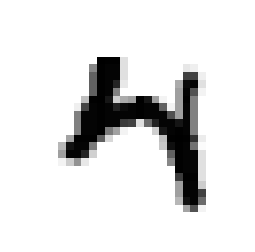

In [51]:
some_digit = X[30000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [52]:
y[30000]

4.0

In [53]:
# Split the dataset into a training set and a test set.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

> Let's shuffle the training set; this will guarantee that all cross-validation folds will be similar (you don't want one fold to be missing some digits). Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row.

In [54]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [55]:
# Train a Binary Classifier distinguishing between 4 and not-4.
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

In [56]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_4)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [57]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

# Performance Measurement

In [58]:
cross_validation_clf(sgd_clf, X_train, y_train_4)

0.973351332433
0.97065
0.975798789939


In [59]:
cross_val_score(sgd_clf, X_train, y_train_4, cv=3, scoring='accuracy')

array([ 0.97335133,  0.97065   ,  0.97579879])

## Confusion Matrix

The general idea is to count the number of times instances of class A are classified as class B.

In [60]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3)

In [61]:
confusion_matrix(y_train_4, y_train_pred)

array([[53526,   632],
       [  972,  4870]])

- *53322* were correctly classified as not-4. (true negatives)
- *836* were incorrectly classified as 4. (false positives)
- *739* were incorrectly classified as not-4. (false negatives)
- *5103* were correctly classified as 4. (true positives)

A perfect classifier should have only true positives and true negatives.

In [62]:
confusion_matrix(y_train_4, y_train_4)

array([[54158,     0],
       [    0,  5842]])

Percision

$percision=\frac{TP}{TP+FP}$

Recall

$recall=\frac{TP}{TP+FN}$

In [63]:
precision_score(y_train_4, y_train_pred) # 5103/(5103+836) claim confidence

0.88513267902580883

In [64]:
recall_score(y_train_4, y_train_pred) # 5103/(5103+739) ratio detected

0.83361862375898665

In [65]:
f1_score(y_train_4, y_train_pred)

0.85860366713681235

The $F_1$ score favors classifiers that have similar precision and recall. This is not always what you want.

You cannot have it both ways: increasing precision reduces recall, and vice versa. This is called the *precision/recall trade-off*.

In [66]:
# Decision function return the scores of the training set, if the score is greater than a threshold,
# the classifier returns True; otherwise, it returns False.
y_score = sgd_clf.decision_function([some_digit])

In [67]:
y_score

array([ 271073.72479077])

In [68]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv=3, method='decision_function')

In [69]:
precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

In [70]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

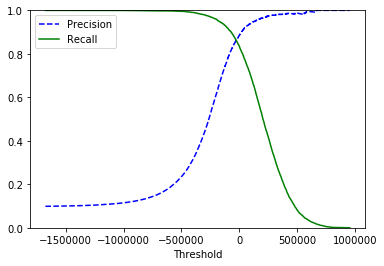

In [71]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [72]:
y_scores

array([ -548016.96984954,  -559063.86677184, -1431524.33822868, ...,
        -714603.58928994,  -840817.79398239,  -448355.90267675])

# Multiclass Classification

*Multiclass classification* is also called *multinominal classification*.
- Multiple classes: Random Forest, naive Bayes
- Binary classifier: Support Vector Machine, Linear classifier

Strategies:
- one-versus-all (OvA)
- one-versus-one (OvO): $N\times (N-1)/2$

In [73]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [74]:
sgd_clf.predict([some_digit])

array([ 4.])

In [75]:
# Output the scores of each class
# The highest is Class-4
sgd_clf.decision_function([some_digit])

array([[-657923.17200862, -970370.7389332 , -675136.69539753,
        -327504.47373955,  271073.72479077,  -91429.92287061,
        -267930.38749528, -535337.72046998, -328708.30472279,
         -39901.57423444]])

In [76]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [77]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [78]:
forest_clf.predict([some_digit])

array([ 4.])

In [79]:
forest_clf.predict_proba([some_digit])

array([[ 0. ,  0. ,  0. ,  0. ,  0.9,  0.1,  0. ,  0. ,  0. ,  0. ]])

In [80]:
# Cross Validation
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.87407518,  0.87769388,  0.86948042])

In [81]:
# Cross Validation
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

array([ 0.94346131,  0.94219711,  0.94024104])

# Error Analysis

In [82]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

In [83]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5764,    1,   30,   17,   15,   23,   20,    5,   33,   15],
       [   1, 6078,  126,   52,    6,   30,   17,   18,  365,   49],
       [  67,   38, 5243,  115,   65,   52,   97,   63,  191,   27],
       [  46,   14,  289, 5225,   15,  195,   28,   54,  105,  160],
       [  39,   11,   54,   19, 5157,   28,   57,   22,   77,  378],
       [ 118,   11,   91,  317,   69, 4282,   89,   20,  277,  147],
       [  69,   10,  109,    3,   25,  143, 5483,    6,   63,    7],
       [  35,    6,  126,   65,   86,   14,    8, 5519,   31,  375],
       [  71,   59,  170,  216,   75,  364,   46,   34, 4593,  223],
       [  59,    9,   38,  169,  213,   41,    4,  259,   76, 5081]])

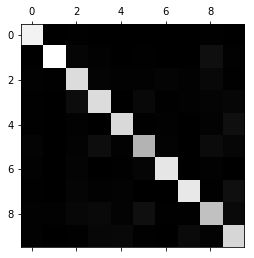

In [84]:
# Observe graphically
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

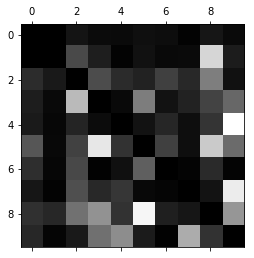

In [85]:
# Focus on the errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

> The brighter blocks indicate more incorrect classification. For example, (Row 5, Col 3) is the number of 5s which are predicted as 3s.

# Multilabel Classification

In some cases you may want your classifier to output multiple classes for each instance. For example, consider a face-recognition classifier: what should it do if it recognizes several people on the same picture?

In [87]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilable = np.c_[y_train_large, y_train_odd]

In [88]:
y_multilable

array([[False,  True],
       [False,  True],
       [False, False],
       ..., 
       [False, False],
       [ True,  True],
       [ True, False]], dtype=bool)

In [89]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilable)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [91]:
knn_clf.predict([some_digit])

array([[False, False]], dtype=bool)

In [ ]:
# Evaluation: cross validation and compute the average F1 score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilable, cv=3)